# Importing the necessary libraries

In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn

print("python :{}".format(sys.version))
print("numpy :{}".format(numpy.__version__))
print("pandas :{}".format(pandas.__version__))
print("pmatplotlib :{}".format(matplotlib.__version__))
print("seaborn :{}".format(seaborn.__version__))
print("scipy :{}".format(scipy.__version__))


python :3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
numpy :1.19.5
pandas :1.1.5
pmatplotlib :3.2.2
seaborn :0.11.1
scipy :1.4.1


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored

# Importing the DataSet

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [6]:
data.info() # The count of each column is 284807 which suggests there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
print(data.describe()) 
# Min values of Time and Amount is 0 which indicates there are no negative values in Time and Amount columns 

                Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]


# Exploratory Data Analysis

Checking whether the data has any null values or not

In [8]:
data.isnull().values.any()

False

Checking the data shape

In [9]:
print(data.shape)
print(colored('Columns - {}'.format(data.shape[0]), attrs=['bold']))
print(colored('Rows - {}'.format(data.shape[1]), attrs=['bold']))

(284807, 31)
Columns - 284807
Rows - 31


Calculating the outlier fraction

In [10]:
# Finding the count of fraudulent and non-fraudulent transactions  
fraud_cases = data[data["Class"] == 1]
valid_cases = data[data["Class"] == 0]

print(colored("Fraudulent Transactions {}".format(len(fraud_cases)), attrs=['bold']))
print(colored("Non-Fraudulent Transactions {}".format(len(valid_cases)), attrs=['bold']))

# Finding ratio of fraudulent to non-fraudulent transactions i.e. the outlier fraction
Outlier_fraction = len(fraud_cases)/float(len(valid_cases))
print(colored("Outlier Fraction {}".format(Outlier_fraction), attrs=['bold']))

Fraudulent Transactions 492
Non-Fraudulent Transactions 284315
Outlier Fraction 0.0017304750013189597


Representing Normal vs Fraud transactions via a bar graph

Text(0, 0.5, 'Count')

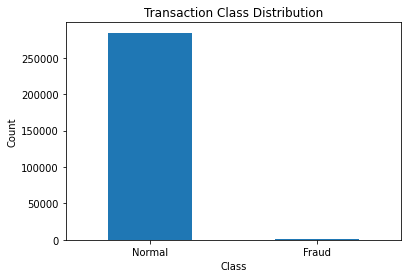

In [62]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

label = ["Normal", "Fraud"]
plt.xticks(range(2), label)

plt.xlabel("Class")
plt.ylabel("Count")

Heat Map to show correlation between out predicting variables and class variables


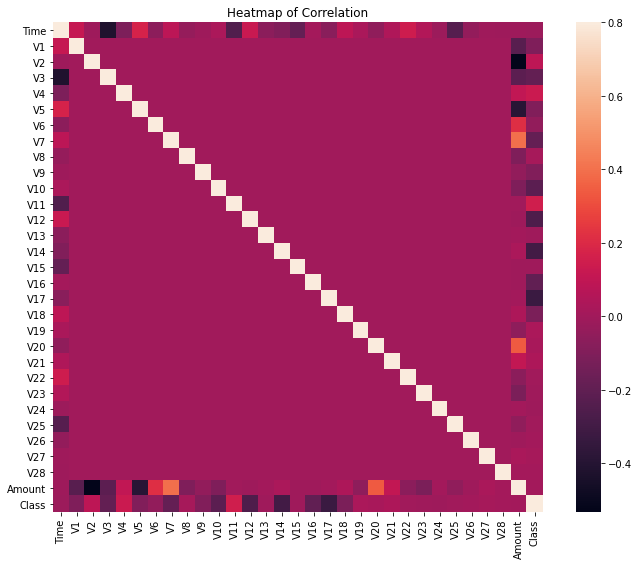

In [63]:
# Plotting heatmap to show there is no strong correlation b/w class, amount or class, time
cormat=data.corr()
fig=plt.figure(figsize=(12,9))

sns.heatmap(cormat,vmax = .8 ,square=True,)
print(colored("Heat Map to show correlation between out predicting variables and class variables", attrs=['bold']))
plt.title("Heatmap of Correlation")
plt.show()

From the above heatmap, we observe that there are no significant correlation between the reduced features V1 to V28. Therefore we don't have to drop any of the columns as they are fairly unrelated to each other.

###**Summary -:** Since there are no missing values, no columns to be dropped and no incorrect data, there are no preprocessing steps required and we procees to train the models.

# Training the Models

In [12]:
# Dividing the X and the Y from the dataset 
columns=data.columns.tolist()

columns=[c for c in columns if c not in ["Class"]]

target="Class"

X=data[columns]
Y=data[target]

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


### Local Outlier Factor

Training at 60% dataset

In [13]:
# Using Skicit-learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTrain60, xTest60, yTrain60, yTest60 = train_test_split(X, Y, train_size=0.6, random_state=1)


In [14]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=Outlier_fraction)

In [15]:
lof.fit(xTrain60, yTrain60)
yPred60 = lof.fit_predict(xTest60) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred60[yPred60 == 1] = 0
yPred60[yPred60 == -1] = 1

Number of errors: 370
Accuracy: 99.67521922702176

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.04      0.04      0.04       186

    accuracy                           1.00    113923
   macro avg       0.52      0.52      0.52    113923
weighted avg       1.00      1.00      1.00    113923



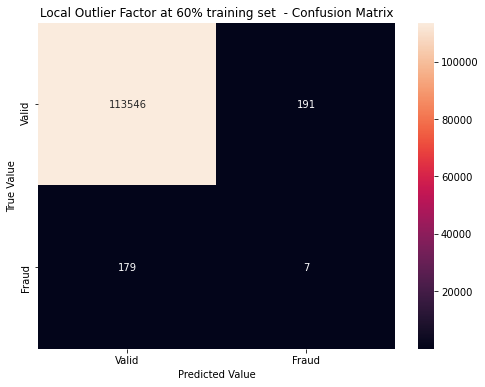


Local Outlier factor at 60% training set
f1-score=0.036 auc=0.037


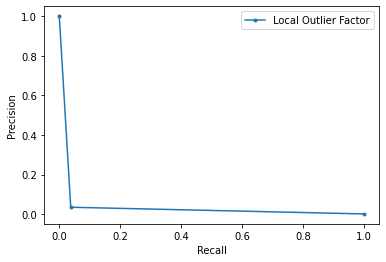

In [16]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest60, yPred60), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier Factor at 60% training set  - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)

lofauc60 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier factor at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 70% dataset

In [17]:
# Split the data into training and testing sets for 70% training set and 30% testing set
xTrain70, xTest70, yTrain70, yTest70 = train_test_split(X, Y, train_size=0.7, random_state=1)

In [18]:
lof.fit(xTrain70, yTrain70)
yPred70 = lof.fit_predict(xTest70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred70[yPred70 == 1] = 0
yPred70[yPred70 == -1] = 1

Number of errors: 273
Accuracy: 99.6804887468839

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.03      0.04      0.04       135

    accuracy                           1.00     85443
   macro avg       0.52      0.52      0.52     85443
weighted avg       1.00      1.00      1.00     85443



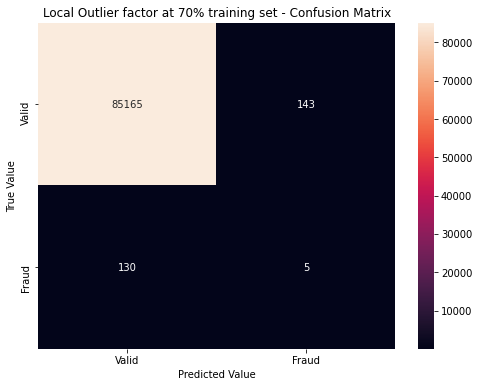


Local Outlier factor at 70% training set
f1-score=0.035 auc=0.036


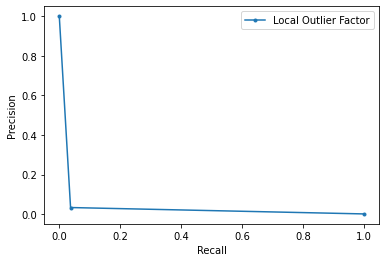

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc70 = metrics.accuracy_score(yTest70, yPred70)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest70, yPred70), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier factor at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()
 
lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
lofauc70 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier factor at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 80% dataset

In [20]:
# Split the data into training and testing sets for 80% training set and 20% testing set
xTrain80, xTest80, yTrain80, yTest80 = train_test_split(X, Y, train_size=0.8, random_state=1)

In [21]:
lof.fit(xTrain80, yTrain80)
yPred80 = lof.fit_predict(xTest80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred80[yPred80 == 1] = 0
yPred80[yPred80 == -1] = 1

Number of errors: 182
Accuracy: 99.6804887468839

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.02      0.02      0.02        87

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962




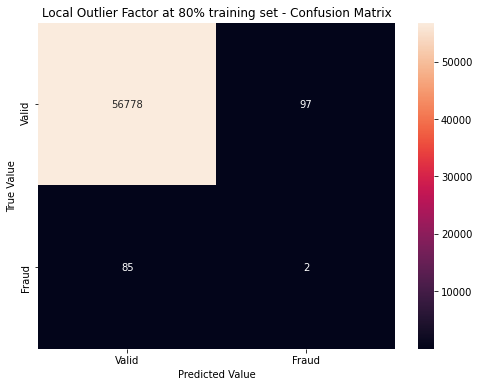


Local Outlier Factor at 80% training set
f1-score=0.022 auc=0.022


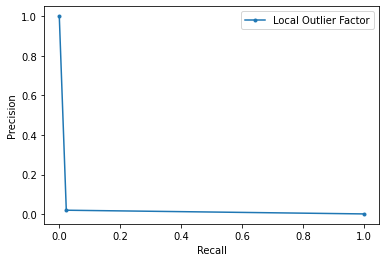

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))
print()

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
lofacc80 = metrics.accuracy_score(yTest80, yPred80)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest80, yPred80), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Local Outlier Factor at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = metrics.precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
lofauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Local Outlier Factor at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


### Isolation Forest 

Training at 60% dataset

In [23]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(max_samples=len(xTrain60), contamination=Outlier_fraction, random_state=1)


In [24]:
isf.fit(xTrain60, yTrain60)
yPred60 = isf.predict(xTest60) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred60[yPred60 == 1] = 0
yPred60[yPred60 == -1] = 1

Number of errors: 252
Accuracy: 99.77879796002563

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113737
           1       0.31      0.30      0.31       186

    accuracy                           1.00    113923
   macro avg       0.66      0.65      0.65    113923
weighted avg       1.00      1.00      1.00    113923



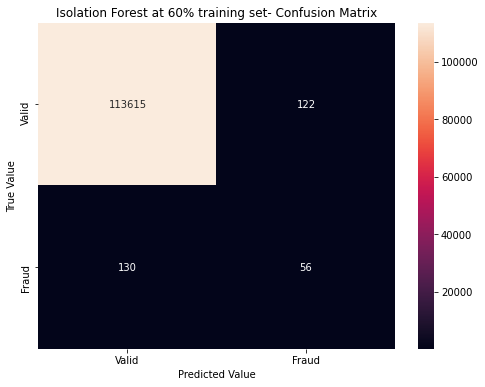


Isolation Forest at 60% training set
f1-score=0.308 auc=0.308


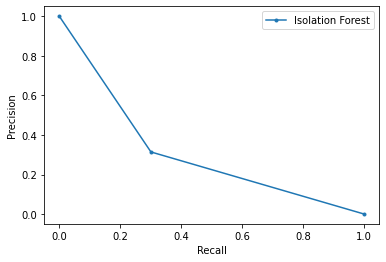

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest60, yPred60), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 60% training set- Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)
# summarize scores
isfauc60 = auc(lr_recall, lr_precision)
print(colored('Isolation Forest at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 70% dataset

In [26]:
isf = IsolationForest(max_samples=len(xTrain70), contamination=Outlier_fraction, random_state=1)

In [27]:
isf.fit(xTrain70, yTrain70)
yPred70 = isf.predict(xTest70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred70[yPred70 == 1] = 0
yPred70[yPred70 == -1] = 1

Number of errors: 188
Accuracy: 99.77997027257938

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.31      0.33      0.32       135

    accuracy                           1.00     85443
   macro avg       0.66      0.66      0.66     85443
weighted avg       1.00      1.00      1.00     85443




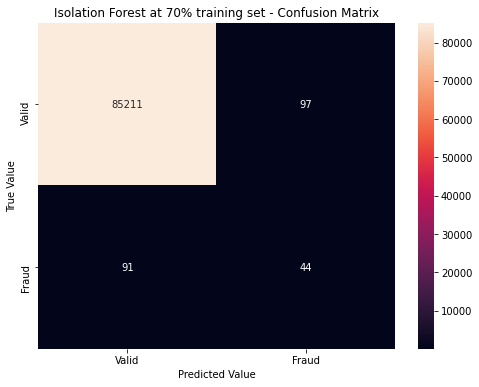


Isolation Forest at 70% training set
f1-score=0.319 auc=0.320


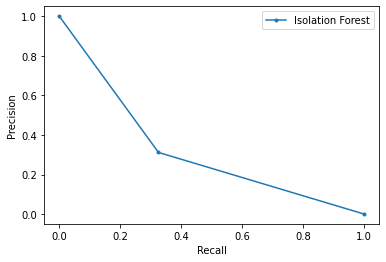

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc70 = metrics.accuracy_score(yTest70, yPred70)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest70, yPred70), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
isfauc70 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))


plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 80% dataset

In [29]:
isf = IsolationForest(max_samples=len(xTrain80), contamination=Outlier_fraction, random_state=1)

In [30]:
isf.fit(xTrain80, yTrain80)
yPred80 = isf.predict(xTest80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPred80[yPred80 == 1] = 0
yPred80[yPred80 == -1] = 1

Number of errors: 118
Accuracy: 99.79284435237527

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56875
           1       0.33      0.34      0.34        87

    accuracy                           1.00     56962
   macro avg       0.66      0.67      0.67     56962
weighted avg       1.00      1.00      1.00     56962




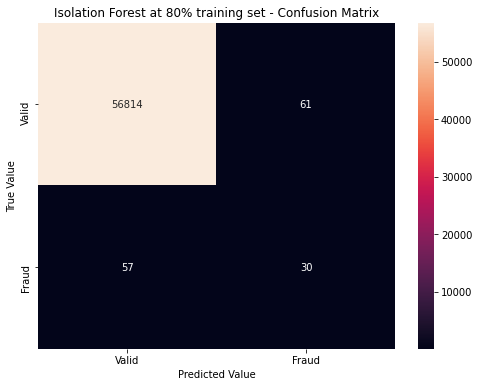


Isolation Forest at 80% training set
f1-score=0.337 auc=0.338


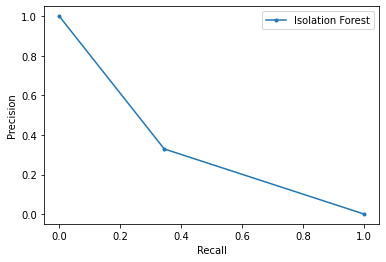

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
isfacc80 = metrics.accuracy_score(yTest80, yPred80)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest80, yPred80), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("Isolation Forest at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
isfauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('Isolation Forest at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Isolation Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


### K-Means Clustering

In [32]:
# from sklearn.cluster import k-means clustering
from sklearn.cluster import KMeans
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

Training at 60% dataset

In [33]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain60, xTest60, yTrain60, yTest60 = train_test_split(X, Y, train_size=0.6, random_state=1)

In [34]:
# predict using test data
gs.fit(xTrain60, yTrain60)
yPred60 = gs.predict(xTest60)

Number of errors: 52407
Accuracy: 53.997875758187554

              precision    recall  f1-score   support

           0       1.00      0.54      0.70    113737
           1       0.00      0.38      0.00       186

    accuracy                           0.54    113923
   macro avg       0.50      0.46      0.35    113923
weighted avg       1.00      0.54      0.70    113923



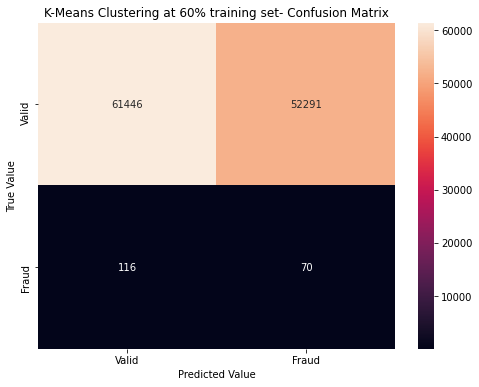


K-Means Clustering at 60% training set
f1-score=0.003 auc=0.189


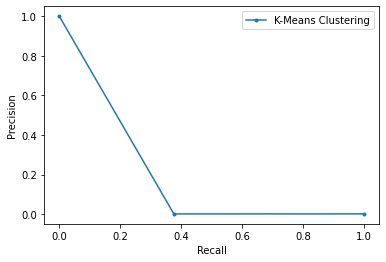

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred60 != yTest60).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest60, yPred60) * 100), attrs=['bold']))
print()
print(classification_report(yTest60, yPred60))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc60 = metrics.accuracy_score(yTest60, yPred60)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest60, yPred60), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 60% training set- Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest60, yPred60)
lr_f1, lr_auc = f1_score(yTest60, yPred60), auc(lr_recall, lr_precision)
gsauc60 = auc(lr_recall, lr_precision)
# summarize scores

print(colored('K-Means Clustering at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 70% dataset

In [36]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain70, xTest70, yTrain70, yTest70 = train_test_split(X, Y, train_size=0.7, random_state=1)

In [37]:
# predict using test data
yPred70 = gs.fit(xTrain70, yTrain70).predict(xTest70)

Number of errors: 39410
Accuracy: 53.87568320400735

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     85308
           1       0.00      0.39      0.00       135

    accuracy                           0.54     85443
   macro avg       0.50      0.46      0.35     85443
weighted avg       1.00      0.54      0.70     85443



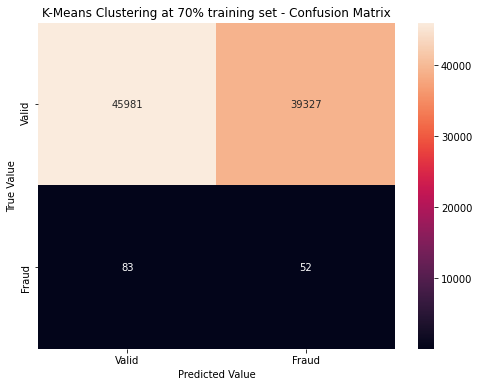


K-Means Clustering at 70% training set
f1-score=0.003 auc=0.194


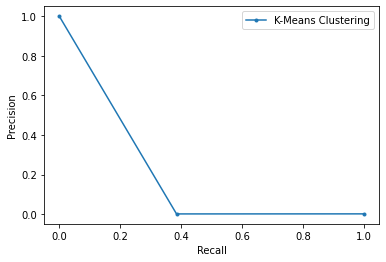

In [38]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred70 != yTest70).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest70, yPred70) * 100), attrs=['bold']))
print()
print(classification_report(yTest70, yPred70))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc70 = metrics.accuracy_score(yTest70, yPred70)
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest70, yPred70), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 70% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()
 
lr_precision, lr_recall, _ = precision_recall_curve(yTest70, yPred70)
lr_f1, lr_auc = f1_score(yTest70, yPred70), auc(lr_recall, lr_precision)
gsauc70 = auc(lr_recall, lr_precision)

# summarize scores
print(colored('K-Means Clustering at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 80% dataset

In [39]:
# Split the data into training and testing sets for 60% training set and 40% test set
xTrain80, xTest80, yTrain80, yTest80 = train_test_split(X, Y, train_size=0.8, random_state=1)

In [40]:
# predict using test data
yPred80 = gs.fit(xTrain80, yTrain80).predict(xTest80)


Number of errors: 26257
Accuracy: 53.904357290825466

              precision    recall  f1-score   support

           0       1.00      0.54      0.70     56875
           1       0.00      0.36      0.00        87

    accuracy                           0.54     56962
   macro avg       0.50      0.45      0.35     56962
weighted avg       1.00      0.54      0.70     56962




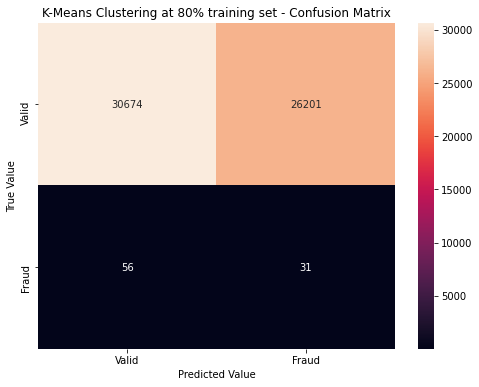


K-Means Clustering at 80% training set
f1-score=0.002 auc=0.179


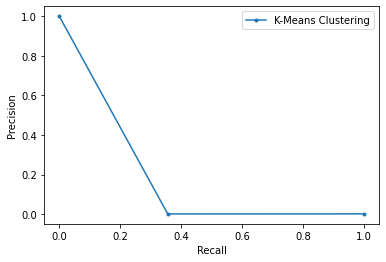

In [41]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

n_errors = (yPred80 != yTest80).sum()
print(colored('Number of errors: {}'.format(n_errors), attrs=['bold']))
print(colored('Accuracy: {}'.format(accuracy_score(yTest80, yPred80) * 100), attrs=['bold']))
print()
print(classification_report(yTest80, yPred80))

# Plotting the confusion matrix 
classdict = {'normal':0, 'fraudulent':1}
gsacc80 = metrics.accuracy_score(yTest80, yPred80)
print()
labels= ['Valid', 'Fraud'] 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_matrix(yTest80, yPred80), xticklabels= labels, yticklabels= labels, annot=True, fmt="d")
plt.title("K-Means Clustering at 80% training set - Confusion Matrix") 
plt.ylabel('True Value') 
plt.xlabel('Predicted Value') 
plt.show()
print()


lr_precision, lr_recall, _ = precision_recall_curve(yTest80, yPred80)
lr_f1, lr_auc = f1_score(yTest80, yPred80), auc(lr_recall, lr_precision)
gsauc80 = auc(lr_recall, lr_precision)
# summarize scores
print(colored('K-Means Clustering at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='K-Means Clustering')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


## Comparison of area under precision recall curves 

Training at 60% dataset

In [42]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr60, xTs60, yTr60, yTs60 = train_test_split(X, Y, train_size=0.6, random_state=1)

xTr60iso, xTs60iso, yTr60iso, yTs60iso = train_test_split(X, Y, train_size=0.6, random_state=1)

xTr60gs, xTs60gs, yTr60gs, yTs60gs = train_test_split(X, Y, train_size=0.6, random_state=1)


In [43]:
lof.fit(xTr60, yTr60)
yPr60 = lof.fit_predict(xTs60) 
# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr60[yPr60 == 1] = 0
yPr60[yPr60 == -1] = 1


In [44]:
isf = IsolationForest(max_samples=len(xTr60iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr60iso, yTr60iso)
yPr60iso = isf.predict(xTs60iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr60iso[yPr60iso == 1] = 0
yPr60iso[yPr60iso == -1] = 1

In [45]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr60gs = gs.fit(xTr60gs, yTr60gs).predict(xTs60gs)


Local Outlier factor at 60% training set
f1-score=0.036 auc=0.037

Isolation Forest at 60% training set
f1-score=0.308 auc=0.308

K-Means Clustering at 60% training set
f1-score=0.003 auc=0.189



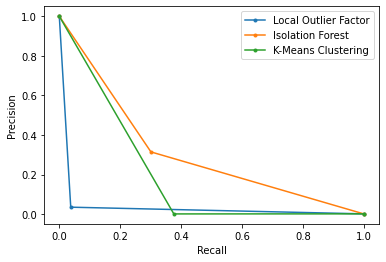

In [46]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs60, yPr60)
lr_f1, lr_auc = f1_score(yTs60, yPr60), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs60iso, yPr60iso)
lr_f1iso, lr_auciso = f1_score(yTs60iso, yPr60iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs60gs, yPr60gs)
lr_f1gs, lr_aucgs = f1_score(yTs60gs, yPr60gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 60% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()



Training at 70% dataset

In [47]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr70, xTs70, yTr70, yTs70 = train_test_split(X, Y, train_size=0.7, random_state=1)

xTr70iso, xTs70iso, yTr70iso, yTs70iso = train_test_split(X, Y, train_size=0.7, random_state=1)

xTr70gs, xTs70gs, yTr70gs, yTs70gs = train_test_split(X, Y, train_size=0.7, random_state=1)

In [48]:
lof.fit(xTr70, yTr70)
yPr70 = lof.fit_predict(xTs70) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr70[yPr70 == 1] = 0
yPr70[yPr70 == -1] = 1


In [49]:
isf = IsolationForest(max_samples=len(xTr70iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr70iso, yTr70iso)
yPr70iso = isf.predict(xTs70iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr70iso[yPr70iso == 1] = 0
yPr70iso[yPr70iso == -1] = 1


In [50]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr70gs = gs.fit(xTr70gs, yTr70gs).predict(xTs70gs)

Local Outlier factor at 70% training set
f1-score=0.035 auc=0.036

Isolation Forest at 70% training set
f1-score=0.319 auc=0.320

K-Means Clustering at 70% training set
f1-score=0.003 auc=0.194



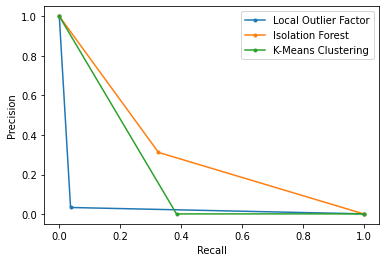

In [51]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs70, yPr70)
lr_f1, lr_auc = f1_score(yTs70, yPr70), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs70iso, yPr70iso)
lr_f1iso, lr_auciso = f1_score(yTs70iso, yPr70iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs70gs, yPr70gs)
lr_f1gs, lr_aucgs = f1_score(yTs70gs, yPr70gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 70% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


Training at 80% dataset

In [52]:
from sklearn.model_selection import train_test_split 

# Split the data into training and testing sets for 60% training set and 40% test set
xTr80, xTs80, yTr80, yTs80 = train_test_split(X, Y, train_size=0.8, random_state=1)

xTr80iso, xTs80iso, yTr80iso, yTs80iso = train_test_split(X, Y, train_size=0.8, random_state=1)

xTr80gs, xTs80gs, yTr80gs, yTs80gs = train_test_split(X, Y, train_size=0.8, random_state=1)

In [53]:
lof.fit(xTr80, yTr80)
yPr80 = lof.fit_predict(xTs80) 

# Reshape the prediction values to 0 for valid, 1 for fraud. 
yPr80[yPr80 == 1] = 0
yPr80[yPr80 == -1] = 1

In [54]:
isf = IsolationForest(max_samples=len(xTr80iso), contamination=Outlier_fraction, random_state=1)
isf.fit(xTr80iso, yTr80iso)
yPr80iso = isf.predict(xTs80iso) 

# Reshape the prediction values to 0 for valid, 1 for fraud.
yPr80iso[yPr80iso == 1] = 0
yPr80iso[yPr80iso == -1] = 1


In [55]:
gs = KMeans(init='k-means++', n_clusters=2,random_state=0)

yPr80gs = gs.fit(xTr80gs, yTr80gs).predict(xTs80gs)

Local Outlier factor at 80% training set
f1-score=0.022 auc=0.022

Isolation Forest at 80% training set
f1-score=0.337 auc=0.338

K-Means Clustering at 80% training set
f1-score=0.002 auc=0.179



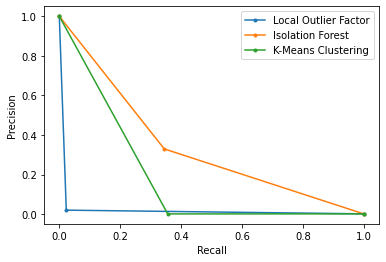

In [56]:
# Representing the comparison in graphical form
lr_precision, lr_recall, _ = precision_recall_curve(yTs80, yPr80)
lr_f1, lr_auc = f1_score(yTs80, yPr80), auc(lr_recall, lr_precision)

lr_precisioniso, lr_recalliso, _ = precision_recall_curve(yTs80iso, yPr80iso)
lr_f1iso, lr_auciso = f1_score(yTs80iso, yPr80iso), auc(lr_recalliso, lr_precisioniso)

lr_precisiongs, lr_recallgs, _ = precision_recall_curve(yTs80gs, yPr80gs)
lr_f1gs, lr_aucgs = f1_score(yTs80gs, yPr80gs), auc(lr_recallgs, lr_precisiongs)

# summarize scores
print(colored('Local Outlier factor at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1, lr_auc), attrs=['bold']))
print()
print(colored('Isolation Forest at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1iso, lr_auciso), attrs=['bold']))
print()
print(colored('K-Means Clustering at 80% training set', attrs=['bold']))
print(colored('f1-score=%.3f auc=%.3f' % (lr_f1gs, lr_aucgs), attrs=['bold']))

plt.plot(lr_recall, lr_precision, marker='.', label='Local Outlier Factor')
plt.plot(lr_recalliso, lr_precisioniso, marker='.', label='Isolation Forest')
plt.plot(lr_recallgs, lr_precisiongs, marker='.', label='K-Means Clustering')
print()
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()


#### Comparing between the algorithms

In [57]:
def calc(auc1, auc2, auc3):
  li = [auc1, auc2, auc3]
  mx = max(li)
  if mx == auc1:
    ans = 'LOCAL OUTLIER FACTOR'
  elif mx == auc2:
    ans = 'ISOLATION FOREST'
  else:
    ans = 'K-MEANS CLUSTERING'    
  return ans 

In [60]:
import plotly.graph_objects as go


ans60 = calc(lofauc60, isfauc60, gsauc60)
ans70 = calc(lofauc70, isfauc70, gsauc70)
ans80 = calc(lofauc80, isfauc80, gsauc80)


fig = go.Figure(data=[go.Table(header=dict(values=['<b>MODEL</b>','<b>TRAIN: 60%, TEST: 40%</b>', '<b>TRAIN: 70%, TEST: 30%</b>', '<b>TRAIN: 80%, TEST: 20%</b>'], fill_color='grey',font=dict(color='white', size=14)),
                 cells=dict(values=[['LOCAL OUTLIER FACTOR',' ','', 'ISOLATION FOREST', ' ','', 'K-MEANS CLUSTERING', ' ', '', 'RECOMMENDED ALGORITHM',''], 
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc60),'', 'ACCURACY: {0:.4f}\n'.format(isfacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc60),'', 'ACCURACY: {0:.4f}\n'.format(gsacc60 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc60), '', ans60],
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc70),'', 'ACCURACY: {0:.4f}\n'.format(isfacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc70),'', 'ACCURACY: {0:.4f}\n'.format(gsacc70 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc70), '', ans70],
                                    ['ACCURACY: {0:.4f}\n'.format(lofacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(lofauc80),'', 'ACCURACY: {0:.4f}\n'.format(isfacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(isfauc80),'', 'ACCURACY: {0:.4f}\n'.format(gsacc80 * 100), 'AUCPRC: {0:.4f}\n'.format(gsauc80), '', ans80],
                                    ],fill_color='lightgray',font = dict(color = 'black', size = 12)))
                     ])
fig.show()

